In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

In [4]:
df = pd.read_csv('/content/purchase+data.csv')
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
 df.isnull().sum()

,0
ID,0
Day,0
Incidence,0
Brand,0
Quantity,0
Last_Inc_Brand,0
Last_Inc_Quantity,0
Price_1,0
Price_2,0
Price_3,0


In [6]:
#import the segmentation model

scaler = pickle.load(open('/content/scaler.pkl','rb'))
pca = pickle.load(open('/content/pca.pkl','rb'))
kmeans = pickle.load(open('/content/km_pca.pkl','rb'))

In [7]:
demo_df = df[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]

demo_std = scaler.transform(demo_df)

In [8]:
demo_pca = pca.transform(demo_std)

In [9]:
seg = kmeans.predict(demo_pca)

In [10]:
df_predict = df.copy()
df_predict['Segment'] = seg

In [11]:
df_predict.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


Descriptive Analysis by Segments

In [12]:
#purchase occations by customer ID
temp1 = df_predict[['ID','Incidence']].groupby(['ID']).count()
temp1 = temp1.rename(columns={'Incidence':'n_visits'})
temp1.head()

,n_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [13]:
temp2 = df_predict[['ID','Incidence']].groupby(['ID']).sum()
temp2 = temp2.rename(columns={'Incidence':'n_purchases'})
temp2.head()

,n_purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [14]:
temp3 = temp1.merge(temp2, left_index=True, right_index=True)
temp3['avg_purchases'] = temp3['n_purchases']/temp3['n_visits']
temp3.head()

,n_visits,n_purchases,avg_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [15]:
temp4 = df_predict[['ID','Segment']].groupby(['ID']).mean()
customer_purchase = temp3.merge(temp4,left_index=True,right_index=True)
customer_purchase.head()

,n_visits,n_purchases,avg_purchases,Segment
ID,,,,
200000001,101,9,0.089109,0.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,1.0
200000005,111,13,0.117117,0.0


In [16]:
seg_prop = customer_purchase[['n_purchases','Segment']].groupby('Segment').count()/customer_purchase.shape[0]
seg_prop.rename(columns={'n_purchases':'proportation'},inplace=True)
seg_prop.head()

,proportation
Segment,
0.0,0.290
1.0,0.362
2.0,0.152
3.0,0.196


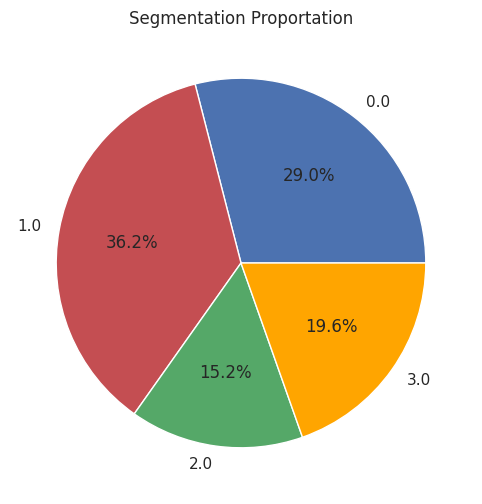

In [17]:
plt.figure(figsize = (8,6))
plt.pie(seg_prop['proportation'],labels=seg_prop.index,autopct='%1.1f%%',colors=('b','r','g','orange'))
plt.title('Segmentation Proportation')
plt.show()

Purchase Occasion and Incidence

In [18]:
seg_mean = customer_purchase.groupby('Segment').mean()
seg_std = customer_purchase.groupby('Segment').std()

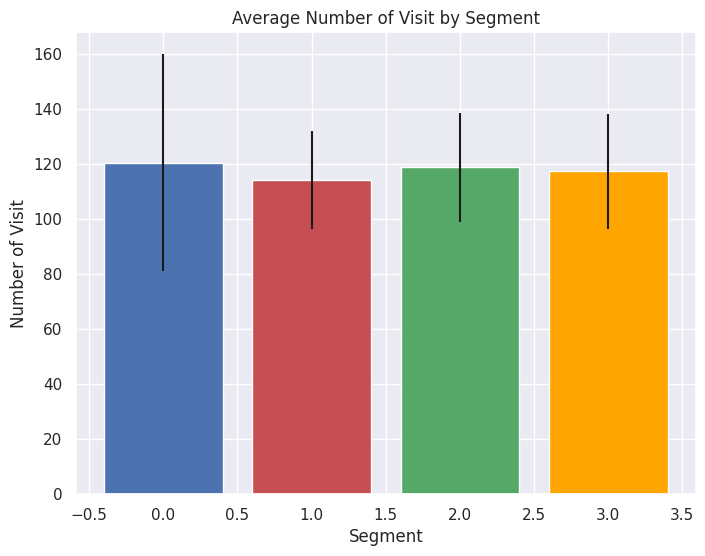

In [19]:
plt.figure(figsize=(8,6))
plt.bar(x = (0,1,2,3),
        height=seg_mean['n_visits'],
        yerr=seg_std['n_visits'],
        color=('b','r','g','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Visit')
plt.title('Average Number of Visit by Segment')
plt.show()

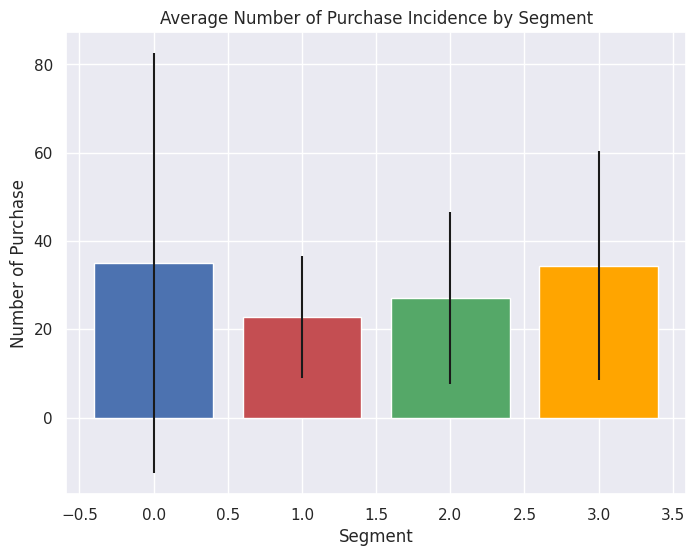

In [20]:
plt.figure(figsize=(8,6))
plt.bar(x = (0,1,2,3),
        height=seg_mean['n_purchases'],
        yerr=seg_std['n_purchases'],
        color=('b','r','g','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchase')
plt.title('Average Number of Purchase Incidence by Segment')
plt.show()

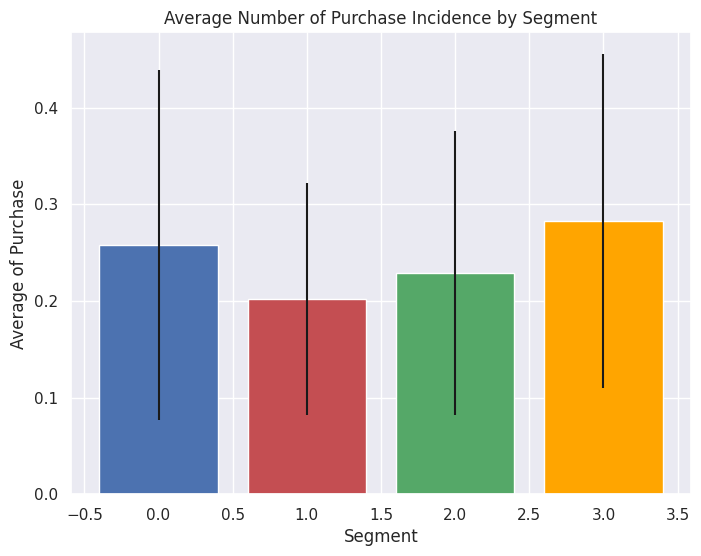

In [21]:
plt.figure(figsize=(8,6))
plt.bar(x = (0,1,2,3),
        height=seg_mean['avg_purchases'],
        yerr=seg_std['avg_purchases'],
        color=('b','r','g','orange'))
plt.xlabel('Segment')
plt.ylabel('Average of Purchase')
plt.title('Average Number of Purchase Incidence by Segment')
plt.show()

Brand Analysis

In [22]:
purchase = df_predict.loc[df_predict['Incidence']==1]

brand_dummies = pd.get_dummies(purchase['Brand'],prefix='brand',prefix_sep='_')
brand_dummies[['Segment','ID']] = purchase[['Segment','ID']]
brand_dummies.head()

,brand_1,brand_2,brand_3,brand_4,brand_5,Segment,ID
6,False,True,False,False,False,0,200000001
11,False,False,False,False,True,0,200000001
19,True,False,False,False,False,0,200000001
24,False,False,False,True,False,0,200000001
29,False,True,False,False,False,0,200000001


In [23]:
temp = brand_dummies.groupby('ID').mean()

brand_choise = temp.groupby('Segment').mean()
brand_choise.head()

,brand_1,brand_2,brand_3,brand_4,brand_5
Segment,,,,,
0.0,0.079019,0.329006,0.029233,0.093493,0.469248
1.0,0.167302,0.597683,0.061925,0.069068,0.104022
2.0,0.232219,0.373984,0.119907,0.077677,0.196212
3.0,0.047030,0.131953,0.029682,0.594854,0.196479


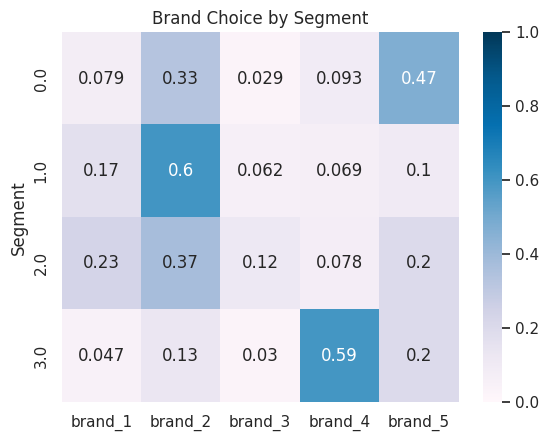

In [24]:
sns.heatmap(brand_choise,
            vmin=0,
            vmax=1, cmap='PuBu',annot=True)
plt.title('Brand Choice by Segment')
plt.show()

Revenue

In [37]:
brand1 = df_predict[df_predict['Brand']==1]
brand1['revenue'] = brand1['Price_1']*brand1['Quantity']
brand_revenue = pd.DataFrame()
brand_revenue[['Segment','Revenue 1']] = brand1[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue

<ipython-input-37-baab9d6662ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand1['revenue'] = brand1['Price_1']*brand1['Quantity']


,Segment,Revenue 1
0,0,912.12
1,1,2807.51
2,2,1869.77
3,3,716.25


In [38]:
brand2 = df_predict[df_predict['Brand']==2]
brand2['revenue'] = brand2['Price_2']*brand2['Quantity']

temp=brand2[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 2'})
brand_revenue
#

<ipython-input-38-e9422d9b62f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand2['revenue'] = brand2['Price_2']*brand2['Quantity']


,Segment,Revenue 1,Revenue 2
0,0,912.12,5222.99
1,1,2807.51,11742.86
2,2,1869.77,3382.47
3,3,716.25,1419.99


In [39]:
brand3 = df_predict[df_predict['Brand']==3]
brand3['revenue'] = brand3['Price_3']*brand3['Quantity']

temp=brand3[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 3'})

<ipython-input-39-2a4c9ecd0a0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand3['revenue'] = brand3['Price_3']*brand3['Quantity']


In [40]:
brand4 = df_predict[df_predict['Brand']==4]
brand4['revenue'] = brand4['Price_4']*brand4['Quantity']

temp=brand4[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 4'})

<ipython-input-40-aa66498bebee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand4['revenue'] = brand4['Price_4']*brand4['Quantity']


In [41]:
brand5 = df_predict[df_predict['Brand']==5]
brand5['revenue'] = brand5['Price_5']*brand5['Quantity']

temp=brand5[['Segment','revenue']].groupby('Segment').sum().reset_index()
brand_revenue = brand_revenue.merge(temp,on='Segment').rename(columns={'revenue':'Revenue 5'})

<ipython-input-41-1d1957cec9c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand5['revenue'] = brand5['Price_5']*brand5['Quantity']


In [43]:
brand_revenue.loc[:,'Revenue 1':'Revenue 5']

,Revenue 1,Revenue 2,Revenue 3,Revenue 4,Revenue 5
0,912.12,5222.99,603.79,2268.95,17838.72
1,2807.51,11742.86,2388.88,1910.89,2638.52
2,1869.77,3382.47,2303.31,1165.16,3638.75
3,716.25,1419.99,725.54,13695.10,5505.01


In [44]:
brand_revenue['Total Revenue'] = brand_revenue.loc[:,'Revenue 1':'Revenue 5'].sum(axis=1)
brand_revenue

,Segment,Revenue 1,Revenue 2,Revenue 3,Revenue 4,Revenue 5,Total Revenue
0,0,912.12,5222.99,603.79,2268.95,17838.72,26846.57
1,1,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66
2,2,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46
3,3,716.25,1419.99,725.54,13695.10,5505.01,22061.89


In [45]:
brand_revenue['segment prop'] = seg_prop['proportation']
brand_revenue

,Segment,Revenue 1,Revenue 2,Revenue 3,Revenue 4,Revenue 5,Total Revenue,segment prop
0,0,912.12,5222.99,603.79,2268.95,17838.72,26846.57,0.290
1,1,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66,0.362
2,2,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46,0.152
3,3,716.25,1419.99,725.54,13695.10,5505.01,22061.89,0.196
